# QRT ENS Data Challenge 2023 - Context

Contexte

Une multitude de facteurs influencent le prix de l'electricité au quotidien. Des variations locales du climat pourront à la fois affecter la production et la demande électrique par exemple. Des phénomènes à plus long terme, comme le réchauffement climatique, auront également un impact évident. Des évènements géopolitiques, comme la guerre en Ukraine, peuvent en parallèle faire bouger le prix des matières premières qui sont clefs dans la production d'électricité, sachant que chaque pays s'appuie sur un mix énergétique qui lui est propre (nucléaire, solaire, hydrolique, gaz, charbon, etc). De plus chaque pays peut importer/exporter de l'électricité avec ses voisins au travers de marchés dynamiques, comme en Europe. Ces différents élements rendent assez complexe la modélisation du prix de l'électricité par pays.

But

L'objectif est de modéliser le prix l'électricité à partir de données météorologiques, énergétiques (matières premières) et commerciales pour deux pays européens - la France et l'Allemagne. On soulignera que c'est ici un problème d'explication des prix par d'autres variables concomitantes et non pas un problème de prédiction.

Plus précisément le but est de construire un modèle qui, à partir de ces variables explicatives, renvoie une bonne estimation de la variation journalière du prix de contrats à terme (dits futures) sur l'électricité, en France ou en Allemagne. Ces contrats permettent d'acheter (ou de vendre) une quantité donnée d'électricité à un prix fixé par le contrat et qui sera livrée à une date future spécifiée (maturité du contrat). Les futures sont donc des instruments financiers qui donnent une estimation de la valeur de l'électricité au moment de la maturité du contrat à partir des conditions actuelles du marché - ici, on se restreint à des futures à courte maturité (24h). Soulignons que l'échange de futures sur l'electricité est un marché dynamique en Europe.

Concernant les variables explicatives, les participants auront accès pour chaque pays à des mesures journalières de données météorologiques (température, quantité de pluie et force du vent), de production énergétique (variations des prix de différentes matières premières / énergies) et d'utilisation de l'électricité (consommation, échanges entre ces deux pays, import-export avec le reste de l'Europe).

La fonction de score (métrique) utilisée est la corrélation de Spearman entre la réponse du participant et les variations réelles du prix des futures contenues dans le jeu de données de test.

N'hésitez pas à consulter notre forum dédié et notre page LinkedIn pour plus d'information sur le challenge et sur QRT.

Description des données

Trois jeux de données sont fournis au format csv : les données d'entrainement en entrée X_train et en sortie Y_train, et les données test en entrée X_test.

NB : Les données d'entrée X_train et X_test représentent les même variables explicatives mais sur deux périodes de temps différentes.

La colonne ID de X_train et Y_train est identique, et de même pour les données test. Les données d'entrainement fournissent 1494 lignes, et les données de test en contiennent 654.

Les données d'entrée possèdent 35 colonnes :

ID : Identifiant d'indexe unique, associé à un jour (DAY_ID) et un pays (COUNTRY),
DAY_ID : Identifiant du jour - les dates ont été annonymisées en préservant la structure des données,
COUNTRY : Identifiant du pays - DE = Allemagne, FR = France,

et composées ensuite de variations journalières du prix de matières premières,

GAS_RET : Gaz en Europe,
COAL_RET : Charbon en Europe,
CARBON_RET : Futures sur les emissions carbone,

de mesures météorologiques (journalières, dans le pays x),

x_TEMP : Temperature,
x_RAIN : Pluie,
x_WIND : Vent,

de mesures de productions d'energie (journalière, dans le pays x),

x_GAS : Gaz naturel,
x_COAL : Charbon,
x_HYDRO : Hydrolique,
x_NUCLEAR : Nucléaire,
x_SOLAR : Photovoltaïque,
x_WINDPOW : Eolienne,
x_LIGNITE : Lignite,

et de mesures d'utilisation électrique (journalières, dans le pays x),

x_CONSUMPTON : Electricité totale consommée,
x_RESIDUAL_LOAD : Electricité consommée après utilisation des énergies renouvelables,
x_NET_IMPORT: Electricité importée depuis l'Europe,
x_NET_EXPORT: Electricité exportée vers l'Europe,
DE_FR_EXCHANGE: Electricité échangée entre Allemagne et France,
FR_DE_EXCHANGE: Electricité échangée entre France et Allemagne.

Les données en sortie se composent de deux colonnes :

ID : Identifiant unique - le même que celui des données d'entrée,
TARGET : Variation journalière du prix de futures d'électricité (maturité 24h).

Les solutions envoyées par les participants devront être structurées comme les données en sortie, à savoir un fichier au format csv avec deux colonnes ID and TARGET, avec comme valeurs ID les valeurs correspondantes à la colonne ID de X_test. Un exemple de fichier contenant une solution aléatoire est fourni - Cf. aussi le notebook fourni en materiel supplémentaire.

Description du benchmark

Le benchmark pour ce challenge consiste en une simple régression linéaire, après un léger nettoyage des données : les valeurs manquantes (NaN) ont été remplacées par des zéros et la colonne COUNTRY a été supprimée - en d'autres termes, nous avons utilisé un modèle identique pour la France et l'Allemagne.

Le score public obtenu pour ce benchmark est de 15.86%. Un notebook contenant la génération du benchmark et quelques discussions est disponible en "supplementary files" que vous trouverez sur cette page (colonne de droite).

## Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


# Data processing / Handling missing values

In [2]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import spearmanr
import numpy as np

import matplotlib.pyplot as plt

  

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

# Create a time series based on DAY_ID to use for interpolation
X_train_sorted = X_train.sort_values(['COUNTRY', 'DAY_ID'])
X_test_sorted = X_test.sort_values(['COUNTRY', 'DAY_ID'])

# Interpolate missing values using polynomial interpolation for each country
X_train_interpolated = X_train.copy()
X_test_interpolated = X_test.copy()

# Get numeric columns for interpolation
numeric_cols = X_train.columns[3:]

# Interpolate by country using polynomial interpolation
for country in ['DE', 'FR']:
    # Create masks for each country
    train_mask = X_train['COUNTRY'] == country
    test_mask = X_test['COUNTRY'] == country
    
    # For training data - interpolate by polynomial degree 3 where possible
    for col in numeric_cols:
        # Sort by DAY_ID for proper interpolation
        temp_df = X_train_sorted[train_mask].copy()
        # Apply polynomial interpolation
        X_train_interpolated.loc[train_mask, col] = temp_df[col].interpolate(
            method='polynomial', order=3, limit_direction='both'
        )
    
    # For test data - interpolate by polynomial degree 3 where possible
    for col in numeric_cols:
        # Sort by DAY_ID for proper interpolation
        temp_df = X_test_sorted[test_mask].copy()
        # Apply polynomial interpolation
        X_test_interpolated.loc[test_mask, col] = temp_df[col].interpolate(
            method='polynomial', order=3, limit_direction='both'
        )

# Fill any remaining NaN values with 0
X_train_interpolated = X_train_interpolated.fillna(0)
X_test_interpolated = X_test_interpolated.fillna(0)

# Update X_train and X_test with the interpolated values
X_train = X_train_interpolated
X_test = X_test_interpolated


# Create a Spearman correlation scorer
def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]

spearman_scorer = make_scorer(spearman_score)






# Verify imputation
print("\nRemaining missing values in X_train after imputation:")
print(X_train.isna().sum())
print("\nRemaining missing values in X_test after imputation:")
print(X_test.isna().sum())


C:\Users\thoma\AppData\Local\Temp\ipykernel_13036\1181111939.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_13036\1181111939.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_13036\1181111939.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_13036\1181111939.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_13036\1181111939.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_13036\


Remaining missing values in X_train after imputation:
ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
dtype: int64

Remaining missing values in X_test after imputation:
ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      

# Features Engineering

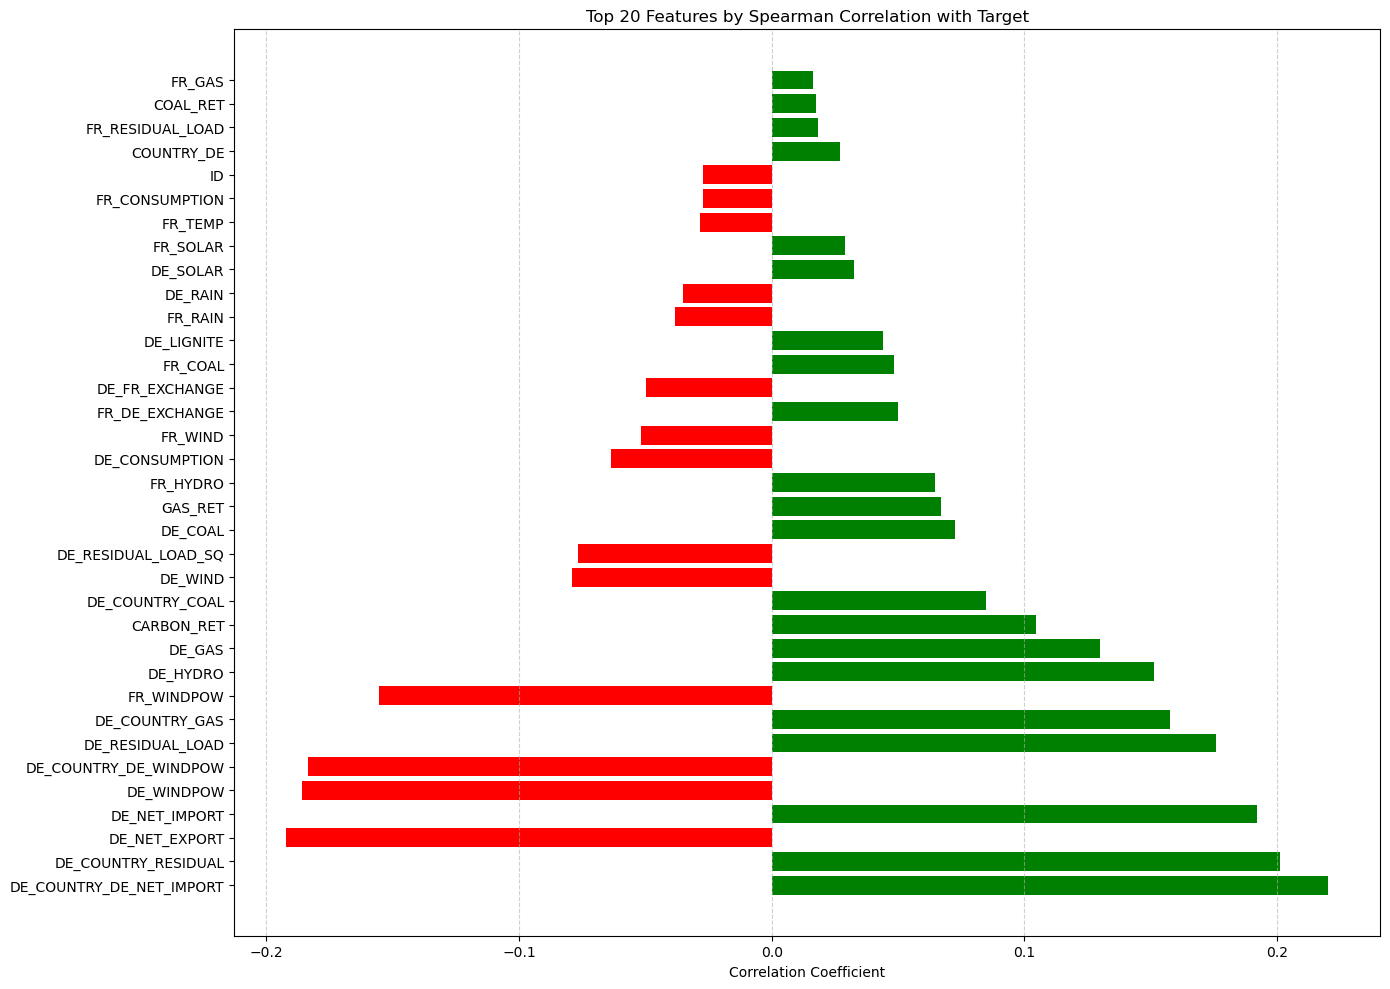

In [3]:
from sklearn.cluster import KMeans



X_train_prep = X_train.copy()
X_test_prep = X_test.copy()

# Create dummy variables for COUNTRY
encoder = OneHotEncoder(sparse_output=False, drop='first', categories=[['FR', 'DE']])
country_encoded_train = encoder.fit_transform(X_train_prep[['COUNTRY']])
country_encoded_test = encoder.transform(X_test_prep[['COUNTRY']])

# Drop non-feature columns and add encoded country
# X_train_features = X_train_prep.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1)
# X_train_features = X_train_prep.drop(['COUNTRY'], axis=1)
X_train_features = X_train_prep.drop(['COUNTRY', 'FR_NUCLEAR','DAY_ID','FR_NET_IMPORT','FR_NET_EXPORT','DE_NUCLEAR','DE_TEMP'], axis=1)
# X_train_features = X_train_prep.drop(['ID', 'DAY_ID'], axis=1)
# X_test_features = X_test_prep.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1)
# X_test_features = X_test_prep.drop(['COUNTRY'], axis=1)
X_test_features = X_test_prep.drop(['COUNTRY', 'FR_NUCLEAR','DAY_ID','FR_NET_IMPORT','FR_NET_EXPORT','DE_NUCLEAR','DE_TEMP'], axis=1)


# Add the encoded country column (only DE since FR is the reference)
X_train_features['COUNTRY_DE'] = country_encoded_train
X_test_features['COUNTRY_DE'] = country_encoded_test

# Get target values
y_train = Y_train['TARGET']



# Squared terms for important variables
X_train_features['DE_RESIDUAL_LOAD_SQ'] = X_train_features['DE_RESIDUAL_LOAD']**2
X_test_features['DE_RESIDUAL_LOAD_SQ'] = X_test_features['DE_RESIDUAL_LOAD']**2



# Features variables only for DE
X_train_features['DE_COUNTRY_GAS'] = X_train_features['COUNTRY_DE'] * X_train_features['DE_GAS']
X_test_features['DE_COUNTRY_GAS'] = X_test_features['COUNTRY_DE'] * X_test_features['DE_GAS']

X_train_features['DE_COUNTRY_COAL'] = X_train_features['COUNTRY_DE'] * X_train_features['DE_COAL']
X_test_features['DE_COUNTRY_COAL'] = X_test_features['COUNTRY_DE'] * X_test_features['DE_COAL']


# X_train_features['DE_COUNTRY_GAS_RET'] = X_train_features['COUNTRY_DE'] * X_train_features['GAS_RET']
# X_test_features['DE_COUNTRY_GAS_RET'] = X_test_features['COUNTRY_DE'] * X_test_features['GAS_RET']


X_train_features['DE_COUNTRY_RESIDUAL'] = X_train_features['COUNTRY_DE'] * X_train_features['DE_RESIDUAL_LOAD']
X_test_features['DE_COUNTRY_RESIDUAL'] = X_test_features['COUNTRY_DE'] * X_test_features['DE_RESIDUAL_LOAD']

X_train_features['DE_COUNTRY_DE_WINDPOW'] = X_train_features['COUNTRY_DE'] * X_train_features['DE_WINDPOW']
X_test_features['DE_COUNTRY_DE_WINDPOW'] = X_test_features['COUNTRY_DE'] * X_test_features['DE_WINDPOW']

X_train_features['DE_COUNTRY_DE_NET_IMPORT'] = X_train_features['COUNTRY_DE'] * X_train_features['DE_NET_IMPORT']
X_test_features['DE_COUNTRY_DE_NET_IMPORT'] = X_test_features['COUNTRY_DE'] * X_test_features['DE_NET_IMPORT']







# Features variables only for FR

# X_train_features['FR_COUNTRY_FR_WINDPOW'] = (1-X_train_features['COUNTRY_DE']) * ( X_train_features['FR_WINDPOW'])








# Calculate correlations with target for all features
correlations = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Pearson_Correlation': [X_train_features[col].corr(y_train) for col in X_train_features.columns],
    'Spearman_Correlation': [X_train_features[col].corr(y_train, method='spearman') for col in X_train_features.columns]
})

# Sort by absolute value of Spearman correlation
correlations['Abs_Spearman'] = correlations['Spearman_Correlation'].abs()
correlations = correlations.sort_values('Abs_Spearman', ascending=False)

# Plot top 20 features by correlation magnitude
plt.figure(figsize=(14, 10))
top_features = correlations.head(42)
colors = ['green' if c > 0 else 'red' for c in top_features['Spearman_Correlation']]
plt.barh(top_features['Feature'], top_features['Spearman_Correlation'], color=colors)
plt.title('Top 20 Features by Spearman Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()



# Outliers

In [108]:
# remove the rows which has the outlier value in the column
X_train_features = X_train_features.drop(X_train_features.idxmax(axis=0))
for i in range(5):
    X_train_features = X_train_features.drop(X_train_features.idxmax(axis=0))

    # Get the indices of the rows that were removed from X_train_features
    removed_indices = set(range(len(y_train))) - set(X_train_features.index)

    # Remove the corresponding rows from y_train
    y_train = y_train.drop(removed_indices)

    # Reset index to match X_train_features
    y_train = y_train.reset_index(drop=True)
    X_train_features = X_train_features.reset_index(drop=True)

In [113]:


corr = X_train_features.corrwith(y_train)
corr = abs(corr).sort_values(ascending=False)[:10]

X_train_features = X_train_features[corr.index]


# Regression Lasso/ridge

c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array i

Best Lasso alpha: 0.001
Best Lasso cross-validation score: 0.2421
Best Ridge alpha: 1000
Best Ridge cross-validation score: 0.2500


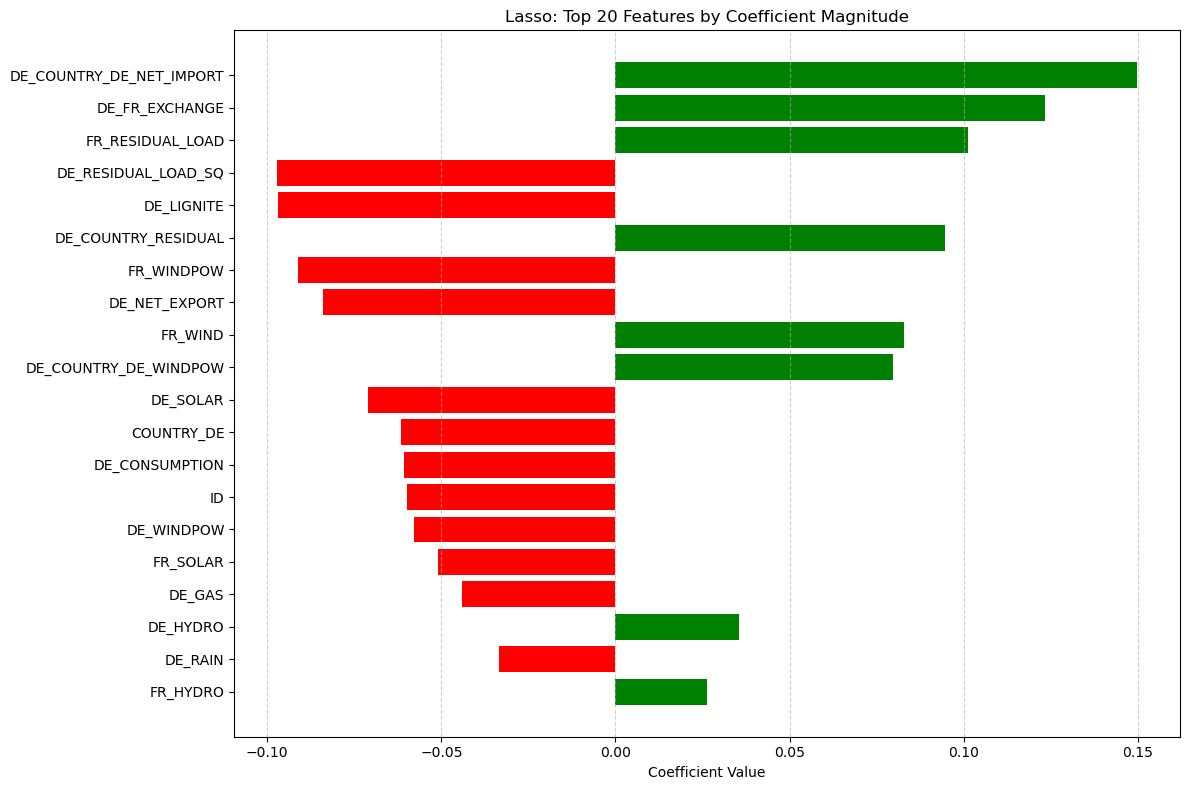

Lasso selected 31 features out of 35
Selected features by Lasso:
                     Feature   Coefficient
34  DE_COUNTRY_DE_NET_IMPORT  1.497869e-01
3             DE_FR_EXCHANGE  1.233528e-01
19          FR_RESIDUAL_LOAD  1.012360e-01
29       DE_RESIDUAL_LOAD_SQ -9.711839e-02
17                DE_LIGNITE -9.696474e-02
32       DE_COUNTRY_RESIDUAL  9.472075e-02
16                FR_WINDPOW -9.129282e-02
5              DE_NET_EXPORT -8.385946e-02
23                   FR_WIND  8.282909e-02
33     DE_COUNTRY_DE_WINDPOW  7.974287e-02
13                  DE_SOLAR -7.103681e-02
28                COUNTRY_DE -6.161302e-02
1             DE_CONSUMPTION -6.074280e-02
0                         ID -6.001356e-02
15                DE_WINDPOW -5.787478e-02
14                  FR_SOLAR -5.090525e-02
7                     DE_GAS -4.401803e-02
11                  DE_HYDRO  3.536216e-02
20                   DE_RAIN -3.333811e-02
12                  FR_HYDRO  2.640295e-02
25                   GAS_RET  2.

In [4]:
# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Define column names for the scaled data
feature_names = X_train_features.columns


# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# LASSO Regression with Grid Search
alphas_lasso = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]
param_grid_lasso = {'alpha': alphas_lasso}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000, random_state=1),
    param_grid_lasso,
    cv=kf,
    scoring=spearman_scorer
)
lasso_grid.fit(X_train_scaled, y_train)

print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso cross-validation score: {lasso_grid.best_score_:.4f}")

# Ridge Regression with Grid Search
# alphas_ridge = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
alphas_ridge = [200, 500, 1000, 1500, 2000]
param_grid_ridge = {'alpha': alphas_ridge}

ridge_grid = GridSearchCV(
    Ridge(random_state=1),
    param_grid_ridge,
    cv=kf,
    scoring=spearman_scorer
)
ridge_grid.fit(X_train_scaled, y_train)

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge cross-validation score: {ridge_grid.best_score_:.4f}")

# Fit final Lasso model with best alpha
final_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=10000, random_state=42)
final_lasso.fit(X_train_scaled, y_train)

final_ridge = Ridge(alpha=ridge_grid.best_params_['alpha'], max_iter=10000, random_state=42)
final_ridge.fit(X_train_scaled, y_train)

# Get feature importance from Lasso coefficients
lasso_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_lasso.coef_
}).sort_values('Coefficient', key=lambda x: abs(x), ascending=False)

# Plot Lasso coefficients (top 20 by magnitude)
plt.figure(figsize=(12, 8))
lasso_top20 = lasso_coef.head(20)
colors = ['green' if c > 0 else 'red' for c in lasso_top20['Coefficient']]
plt.barh(lasso_top20['Feature'], lasso_top20['Coefficient'], color=colors)
plt.title('Lasso: Top 20 Features by Coefficient Magnitude')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Count non-zero coefficients
n_selected = np.sum(final_lasso.coef_ != 0)
print(f"Lasso selected {n_selected} features out of {len(feature_names)}")

# Print features with non-zero coefficients
selected_features = lasso_coef[lasso_coef['Coefficient'] != 0]
print("Selected features by Lasso:")
print(selected_features)

Features_selection(does not improve model)

In [5]:
# Filter X_train_features and X_test_features to keep only the features 
# selected by Lasso (non-zero coefficients)
selected_feature_names = lasso_coef[lasso_coef['Coefficient'] != 0]['Feature'].values

# Create new dataframes with only selected features
X_train_features = X_train_features[selected_feature_names]
X_test_features = X_test_features[selected_feature_names]




# # Create a copy of y_train to avoid modifying the original
# y_train_log = y_train.copy()

# # Handle negative values by using sign(y) * log(1 + abs(y))
# # This preserves the sign while applying a logarithmic transformation
# y_train = np.sign(y_train) * np.log1p(np.abs(y_train))





# Hyperparameters tuning

RandomForest

In [7]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer


# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    # Create RandomForest model with the suggested hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )
    
    # Use 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate the cross-validation score using Spearman correlation
    cv_scores = cross_val_score(
        rf_model, 
        X_train_features, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean score to maximize
    return cv_scores.mean()

# Create an Optuna study to maximize the objective function
study = optuna.create_study(direction='maximize')

# Run the optimization with 100 trials
study.optimize(objective, n_trials=100)

# Print the best parameters and score
print("Best parameters:", study.best_params)
print(f"Best cross-validation score: {study.best_value:.4f}")




[I 2025-05-23 02:22:56,480] A new study created in memory with name: no-name-a337fe56-7337-43a1-8378-78282695642c
[I 2025-05-23 02:23:04,609] Trial 0 finished with value: 0.22342618109622864 and parameters: {'n_estimators': 1000, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.22342618109622864.
[I 2025-05-23 02:23:06,040] Trial 1 finished with value: 0.17646665629585448 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.22342618109622864.
[I 2025-05-23 02:23:08,665] Trial 2 finished with value: 0.20268408730783372 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.22342618109622864.
[I 2025-05-23 02:23:28,175] Trial 3 finished with value: 0.116397725444

KeyboardInterrupt: 

SVR

In [148]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Apply StandardScaler to features (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
# X_test_scaled = scaler.transform(X_test_features)

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'C': trial.suggest_float('C', 0.01, 100.0, log=True),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']) if trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']) != 'linear' else 'scale',
        'epsilon': trial.suggest_float('epsilon', 0.001, 1.0, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
    }
    
    # Add degree parameter only for polynomial kerne
    
    # Create SVR model with the suggested parameters
    model = SVR(**params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(
        model, 
        X_train_scaled, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean CV score (higher is better)
    return cv_scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)  # Adjust n_trials as needed

# Print the best parameters and score
print("Best trial:")
print(f"  Value (Spearman correlation): {study.best_trial.value:.4f}")
print("  Best parameters:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# # Train a final model with the best parameters
# best_params = study.best_trial.params
# best_svr = SVR(**best_params)

# # Perform cross-validation again with the best model to verify performance
# best_cv_scores = cross_val_score(
#     best_svr, 
#     X_train_scaled, 
#     y_train,
#     cv=kf,
#     scoring=spearman_scorer
# )

# print(f"\nCross-validation scores with best model: {best_cv_scores}")
# print(f"Mean score: {best_cv_scores.mean():.4f}")
# print(f"Standard deviation: {best_cv_scores.std():.4f}")


#potential 29.2 {'C': 506.763356566977, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.0011030512042705693, 'gamma_type': 'numeric', 'gamma_value': 0.00016057694056836086}

[I 2025-05-30 16:45:20,441] A new study created in memory with name: no-name-f1f394e5-bd53-4b73-9c5b-9a928acf6cae
[I 2025-05-30 16:45:37,484] Trial 0 finished with value: 0.2701774206393518 and parameters: {'C': 10.622893683902696, 'kernel': 'linear', 'epsilon': 0.00543767083407187}. Best is trial 0 with value: 0.2701774206393518.
[I 2025-05-30 16:45:38,598] Trial 1 finished with value: 0.2678887392482222 and parameters: {'C': 0.4435167826297087, 'kernel': 'linear', 'epsilon': 0.02431074207764744}. Best is trial 0 with value: 0.2701774206393518.
[I 2025-05-30 16:45:40,861] Trial 2 finished with value: 0.2708370157923824 and parameters: {'C': 0.9179204875685272, 'kernel': 'linear', 'epsilon': 0.0064229552881281135}. Best is trial 2 with value: 0.2708370157923824.
[I 2025-05-30 16:45:41,251] Trial 3 finished with value: 0.22797966454475077 and parameters: {'C': 0.6789656479740342, 'kernel': 'poly', 'gamma': 'scale', 'epsilon': 0.009137403104245557}. Best is trial 2 with value: 0.27083701

Best trial:
  Value (Spearman correlation): 0.2871
  Best parameters:
    C: 0.15251919308290432
    kernel: rbf
    gamma: scale
    epsilon: 0.00619171748617777


Catboost

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': False,
        'random_seed': 42
    }
    
    # Create CatBoost model with the suggested parameters
    model = CatBoostRegressor(**params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(
        model, 
        X_train_features, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean CV score (higher is better)
    return cv_scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Adjust n_trials as needed

# Print the best parameters and score
print("Best trial:")
print(f"  Value (Spearman correlation): {study.best_trial.value:.4f}")
print("  Best parameters:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")


LGBM

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
def objective(trial):
    #
    params = {
        'objective': 'regression',
        'metric': 'rmse',  # We'll optimize RMSE, but evaluate with Spearman correlation
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'num_leaves': trial.suggest_int('num_leaves', 15, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': 42,
        'verbose': [-1]
    }
    
    # Create model with the specified parameters
    model = LGBMRegressor(**params)
    
    # Cross-validate the model
    cv_scores = cross_val_score(
        model, 
        X_train_features, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean score (higher is better, so no negative sign needed)
    return cv_scores.mean()

# Create an Optuna study to maximize the score
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=50)

# Print the best parameters and score
print("Best trial:")
print(f"  Value (Spearman correlation): {study.best_trial.value:.4f}")
print("  Params:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# Train a final model with the best parameters
best_params = study.best_trial.params
best_lgbm = LGBMRegressor(**best_params)

# Perform cross-validation again with the best model to verify performance
best_cv_scores = cross_val_score(
    best_lgbm, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print(f"\nCross-validation scores with best model: {best_cv_scores}")
print(f"Mean score: {best_cv_scores.mean():.4f}")
print(f"Standard deviation: {best_cv_scores.std():.4f}")




[I 2025-05-22 02:09:06,608] A new study created in memory with name: no-name-75752de9-3cdc-49fd-91ff-9d2e985bdf7a
[I 2025-05-22 02:09:08,147] Trial 0 finished with value: 0.2474047701761112 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.2474047701761112.
[I 2025-05-22 02:09:09,880] Trial 1 finished with value: 0.25927983888066386 and parameters: {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.25927983888066386.
[I 2025-05-22 02:09:23,172] Trial 2 finished with value: 0.2339290567253461 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.25927983888066386.
[I 2025-05-22 02:09:30,032] Trial 3 finished with value: 0.247061726177866

Best parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}
Best cross-validation score: 0.2635


In [ ]:
{'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}

# Light GBM


In [10]:

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer



# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)


lgbm_model = LGBMRegressor(
    objective='regression',
    num_leaves=66,
    n_estimators=395,
    max_depth=11,
    subsample=0.6492490940281487,
    colsample_bytree=0.6691972146849207,
    learning_rate=0.005645533719217677,
    min_child_samples=12,
    reg_alpha=3.230686740318781e-06,
    reg_lambda=1.4073630776519119e-08,
    # feature_fraction=0.6,
    # bagging_fraction=0.8,
    # bagging_freq=5,
    random_state=42
)



# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    lgbm_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("LightGBM Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

# Train the final model on the full training set
# final_lgbm_model = LGBMRegressor(
#     objective='regression',
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )

# final_lgbm_model.fit(X_train_features, y_train)

# # Make predictions on test data
# lgbm_predictions = final_lgbm_model.predict(X_test_features)

# # Create submission dataframe
# lgbm_submission = pd.DataFrame({
#     'ID': X_test['ID'],
#     'TARGET': lgbm_predictions
# })

# Optional: Save submission to CSV
# lgbm_submission.to_csv('lightgbm_submission.csv', index=False)

# Feature importance
# plt.figure(figsize=(12, 8))
# lgbm_feature_importance = pd.DataFrame({
#     'Feature': X_train_features.columns,
#     'Importance': final_lgbm_model.feature_importances_
# }).sort_values('Importance', ascending=False)

# plt.barh(lgbm_feature_importance['Feature'], lgbm_feature_importance['Importance'])
# plt.xlabel('Importance')
# plt.title('LightGBM Feature Importance')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

LightGBM Cross-validation scores (Spearman correlation): [0.20198963 0.13994449 0.18355325 0.25357366 0.17826428]
Mean cross-validation score: 0.1914650625177559
Standard deviation of cross-validation scores: 0.03703908936805346


# Catboost

In [8]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


kf = KFold(n_splits=5, shuffle=True, random_state=42)



# Define CatBoost model
catboost_model = CatBoostRegressor(
    iterations=100,  #utilise 200
    learning_rate=0.029778221049545684,
    depth=4,  #utilise 10
    subsample=0.6924136021544216,
    l2_leaf_reg=5.007455697346183,
    border_count=34,
    random_strength=0.051437686057850714,
    bagging_temperature=0.47359417746471466,
    random_seed=42,
    verbose=False
)


# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    catboost_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("CatBoost Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())






CatBoost Cross-validation scores (Spearman correlation): [0.20339476 0.0775135  0.16486568 0.29282665 0.30728184]
Mean cross-validation score: 0.20917648527946833
Standard deviation of cross-validation scores: 0.08479861851250214


Hyperparameters tuning

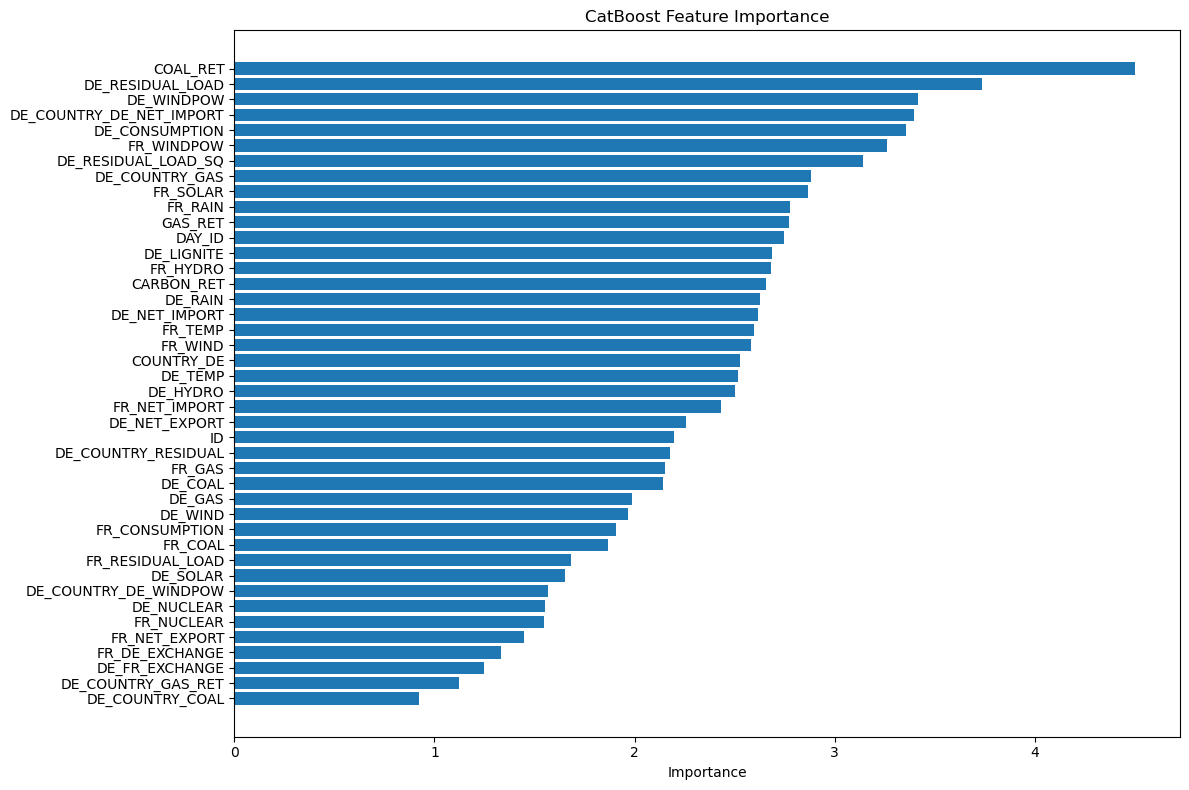

In [51]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# Train the final model on the full training set
final_catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.005,
    depth=10,
    subsample=0.9,
    l2_leaf_reg=4,
    random_seed=42,
    verbose=False
)

final_catboost_model.fit(X_train_features, y_train)

# Make predictions on test data
catboost_predictions = final_catboost_model.predict(X_test_features)



# Create submission dataframe
catboost_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': catboost_predictions
})

# Optional: Save submission to CSV
catboost_submission.to_csv('catboost_submission.csv', index=False)

# Feature importance
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': final_catboost_model.get_feature_importance()
}).sort_values('Importance', ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr


# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)


# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    rf_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("Random Forest Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

# Train the final model on the full training set
final_rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

final_rf_model.fit(X_train_features, y_train)

# Make predictions on test data
rf_predictions = final_rf_model.predict(X_test_features)

# Create submission dataframe
rf_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': rf_predictions
})

# # Feature importance
# plt.figure(figsize=(12, 8))
# rf_feature_importance = pd.DataFrame({
#     'Feature': X_train_features.columns,
#     'Importance': final_rf_model.feature_importances_
# }).sort_values('Importance', ascending=False)

# plt.barh(rf_feature_importance['Feature'][:20], rf_feature_importance['Importance'][:20])
# plt.xlabel('Importance')
# plt.title('Random Forest Top 20 Feature Importance')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

# Optional: Save submission to CSV
rf_submission.to_csv('random_forest_submission.csv', index=False)

Random Forest Cross-validation scores (Spearman correlation): [0.23343539 0.13170673 0.20144488 0.29167247 0.30254139]
Mean cross-validation score: 0.23216017084253307
Standard deviation of cross-validation scores: 0.062499883409673586


# Neural Networks

In [8]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import numpy as np
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.optim as optim

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class ElectricityPriceNet(nn.Module):
    def __init__(self, input_size, dropout_rate=0.3):
        super(ElectricityPriceNet, self).__init__()
        
        # Multi-layer architecture with batch normalization and dropout
        self.network = nn.Sequential(
            # First layer
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            # Second layer
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            # Third layer
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            # Fourth layer
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),  # Reduced dropout for deeper layers
            
            # Output layer
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.network(x).squeeze()

# Training function
def train_neural_network(X_train, y_train, X_val, y_val, epochs=200, batch_size=32, lr=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train).to(device)
    y_train_tensor = torch.FloatTensor(y_train).to(device)
    X_val_tensor = torch.FloatTensor(X_val).to(device)
    y_val_tensor = torch.FloatTensor(y_val).to(device)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    model = ElectricityPriceNet(X_train.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=15, factor=0.5)
    
    best_val_corr = -1
    best_model_state = None
    patience_counter = 0
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
            
            # Calculate Spearman correlation
            val_pred_np = val_outputs.cpu().numpy()
            val_true_np = y_val_tensor.cpu().numpy()
            val_corr = spearmanr(val_true_np, val_pred_np)[0]
            
            if np.isnan(val_corr):
                val_corr = 0
        
        scheduler.step(val_loss)
        
        # Early stopping based on Spearman correlation
        if val_corr > best_val_corr:
            best_val_corr = val_corr
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if epoch % 20 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_loss/len(train_loader):.4f}, '
                  f'Val Loss: {val_loss:.4f}, Val Spearman: {val_corr:.4f}')
        
        # Early stopping
        if patience_counter >= 30:
            print(f'Early stopping at epoch {epoch}')
            break
    
    # Load best model
    model.load_state_dict(best_model_state)
    return model, best_val_corr

# Cross-validation with neural network
def neural_network_cv(X_train_scaled, y_train, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled)):
        print(f"\nFold {fold + 1}")
        
        X_train_fold = X_train_scaled[train_idx]
        y_train_fold = y_train.iloc[train_idx].values
        X_val_fold = X_train_scaled[val_idx]
        y_val_fold = y_train.iloc[val_idx].values
        
        model, val_score = train_neural_network(
            X_train_fold, y_train_fold, X_val_fold, y_val_fold,
            epochs=150, batch_size=32, lr=0.001
        )
        
        cv_scores.append(val_score)
        print(f'Fold {fold + 1} Spearman correlation: {val_score:.4f}')
    
    return cv_scores

# Perform cross-validation
print("Starting Neural Network Cross-Validation...")
nn_cv_scores = neural_network_cv(X_train_scaled, y_train)

print(f"\nNeural Network Cross-validation scores: {nn_cv_scores}")
print(f"Mean CV score: {np.mean(nn_cv_scores):.4f} ± {np.std(nn_cv_scores):.4f}")

# Train final model on full dataset
print("\nTraining final model on full dataset...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use a portion of training data for validation during final training
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_scaled, y_train, test_size=0.15, random_state=42
)

final_nn_model, _ = train_neural_network(
    X_train_final, y_train_final.values, X_val_final, y_val_final.values,
    epochs=200, batch_size=32, lr=0.001
)

# # Make predictions on test data
# final_nn_model.eval()
# with torch.no_grad():
#     X_test_scaled_tensor = torch.FloatTensor(X_test_scaled).to(device)
#     nn_predictions = final_nn_model(X_test_scaled_tensor).cpu().numpy()

# # Create submission dataframe
# nn_submission = pd.DataFrame({
#     'ID': X_test['ID'],
#     'TARGET': nn_predictions
# })

# # Save submission to CSV
# nn_submission.to_csv('neural_network_submission.csv', index=False)

# print("\nNeural Network model trained and submission file created!")
# print(f"Preview of submission file:")
# print(nn_submission.head())

Starting Neural Network Cross-Validation...

Fold 1
Epoch 0: Train Loss: 1.1656, Val Loss: 1.1518, Val Spearman: 0.1752
Epoch 20: Train Loss: 0.9054, Val Loss: 1.2283, Val Spearman: 0.1666
Early stopping at epoch 39
Fold 1 Spearman correlation: 0.2061

Fold 2
Epoch 0: Train Loss: 1.1572, Val Loss: 1.2501, Val Spearman: 0.0652
Epoch 20: Train Loss: 0.9581, Val Loss: 1.2248, Val Spearman: 0.1725
Early stopping at epoch 34
Fold 2 Spearman correlation: 0.1959

Fold 3
Epoch 0: Train Loss: 1.1799, Val Loss: 1.0850, Val Spearman: 0.2005
Epoch 20: Train Loss: 0.8887, Val Loss: 1.1092, Val Spearman: 0.1791
Early stopping at epoch 37
Fold 3 Spearman correlation: 0.2207

Fold 4
Epoch 0: Train Loss: 1.2561, Val Loss: 0.7631, Val Spearman: 0.1950
Epoch 20: Train Loss: 0.9497, Val Loss: 0.8486, Val Spearman: 0.2094
Early stopping at epoch 33
Fold 4 Spearman correlation: 0.2389

Fold 5
Epoch 0: Train Loss: 1.1566, Val Loss: 1.0445, Val Spearman: 0.2173
Epoch 20: Train Loss: 0.9286, Val Loss: 0.9767, 

# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Since we already have scaled data (X_train_scaled, X_test_scaled), we can use them directly
# If not scaled, we would need to scale the data as SVR is sensitive to feature scaling


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)

kf = KFold(n_splits=5, shuffle=True, random_state=15)

# Define parameter grid for SVR
# param_grid_svr = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'epsilon': [0.01, 0.1, 0.2],
#     'kernel': ['linear']
# }

# param_grid_svr = {
#     'C': [100],
#     'gamma': ['scale'],
#     'epsilon': [0.01],
#     'kernel': ['linear']
# }

param_grid_svr = {
    'C': [0.15251919308290432],
    'gamma': ['scale'],
    'epsilon': [0.00619171748617777],
    'kernel': ['rbf'],
    
}

    

# Create SVR model
svr_model = SVR()

# Perform grid search with cross-validation
svr_grid = GridSearchCV(
    svr_model,
    param_grid_svr,
    cv=kf,
    scoring=spearman_scorer,
    
    n_jobs=-1,
    verbose=1
)

# Fit the model
svr_grid.fit(X_train_scaled, y_train)
# svr_grid.fit(X_train_features, y_train)


# Print best parameters and score
print("Best SVR parameters:")
print(svr_grid.best_params_)
print(f"Best SVR cross-validation score: {svr_grid.best_score_:.4f}")

# Train final SVR model with best parameters
final_svr = SVR(**svr_grid.best_params_)
final_svr.fit(X_train_scaled, y_train)

# # Make predictions on test data
# svr_predictions = final_svr.predict(X_test_scaled)

# # Create submission dataframe
# svr_submission = pd.DataFrame({
#     'ID': X_test['ID'],
#     'TARGET': svr_predictions
# })

# # Save submission to CSV
# svr_submission.to_csv('DE_svr_submission.csv', index=False)

# print("\nSVR model trained and submission file created!")
# print(f"Preview of submission file:")
# print(svr_submission.head())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best SVR parameters:
{'C': 0.15251919308290432, 'epsilon': 0.00619171748617777, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVR cross-validation score: 0.2753


SVR(C=0.15251919308290432, epsilon=0.00619171748617777)

In [158]:
# Make predictions on test data
svr_predictions = final_svr.predict(X_test_scaled)

# Create submission dataframe
svr_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': svr_predictions
})

# Save submission to CSV
svr_submission.to_csv('svr_submission.csv', index=False)

print("\nSVR model trained and submission file created!")
print(f"Preview of submission file:")
print(svr_submission.head())


SVR model trained and submission file created!
Preview of submission file:
     ID    TARGET
0  1115 -0.093275
1  1202  0.105163
2  1194 -0.119579
3  1084  0.023988
4  1135 -0.047896


# Test features engineering

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor



kf = KFold(n_splits=5, shuffle=True, random_state=5)



# Define CatBoost model
catboost_model = CatBoostRegressor(
    iterations=100,  #utilise 200
    learning_rate=0.029778221049545684,
    depth=4,  #utilise 10
    subsample=0.6924136021544216,
    l2_leaf_reg=5.007455697346183,
    border_count=34,
    random_strength=0.051437686057850714,
    bagging_temperature=0.47359417746471466,
    random_seed=42,
    verbose=False)

# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    catboost_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)



# Define key variables important for electricity price prediction

# 1. Linear Regression using all features
lin_reg_all = LinearRegression()

lin_reg_all_scores = cross_val_score(
    lin_reg_all, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)



# 2. Using LightGBM with optimized parameters
lgbm_model_opt = LGBMRegressor(
    objective='regression',
    num_leaves=66,
    n_estimators=395,
    max_depth=11,
    subsample=0.6492490940281487,
    colsample_bytree=0.6691972146849207,
    learning_rate=0.005645533719217677,
    min_child_samples=12,
    reg_alpha=3.230686740318781e-06,
    reg_lambda=1.4073630776519119e-08,
    # feature_fraction=0.6,
    # bagging_fraction=0.8,
    # bagging_freq=5,
    random_state=42,
    verbose=-1
)

lgbm_scores = cross_val_score(
    lgbm_model_opt, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)
# rf model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    # n_jobs=-1
)


# Cross-validate the model using Spearman correlation
rf_scores = cross_val_score(
    rf_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

mean_scores = np.mean([lin_reg_all_scores.mean(), lgbm_scores.mean(), rf_scores.mean(), cv_scores.mean()])


# Print performance metrics
print("\n=== MODEL PERFORMANCE ===")
print(f"Linear Regression (All Features) CV mean score: {lin_reg_all_scores.mean():.4f} ± {lin_reg_all_scores.std():.4f}")
print(f"LightGBM CV mean score: {np.mean(lgbm_scores):.4f} ± {np.std(lgbm_scores):.4f}")
print(f"RF CV mean score: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}")
print("Mean cross-validation score:", cv_scores.mean())

print("Mean cross-validation score for all models:", mean_scores)



=== MODEL PERFORMANCE ===
Linear Regression (All Features) CV mean score: 0.2208 ± 0.0429
LightGBM CV mean score: 0.1870 ± 0.0399
RF CV mean score: 0.1941 ± 0.0512
Mean cross-validation score: 0.18004599006896482
Mean cross-validation score for all models: 0.19548543432453686


# TEst

In [37]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# # Apply StandardScaler to features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_features)
# X_test_scaled = scaler.transform(X_test_features)



# X_train_features = X_train.drop(['COUNTRY'], axis=1).fillna(0)
# X_test_features = X_test.drop(['COUNTRY'], axis=1).fillna(0)

# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_features, y_train)

# Make predictions on test data
lin_reg_predictions = lin_reg.predict(X_test_features)

# Create submission dataframe
lin_reg_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': lin_reg_predictions
})

# Save submission to CSV
lin_reg_submission.to_csv('linear_regression_submission.csv', index=False)

print("Linear Regression model trained and submission file created!")
print(f"Preview of submission file:")
print(lin_reg_submission.head())

Linear Regression model trained and submission file created!
Preview of submission file:
     ID    TARGET
0  1115 -0.016400
1  1202  0.076186
2  1194 -0.083498
3  1084 -0.151095
4  1135 -0.074082
